In [1]:
!apt-get update && apt-get install -y build-essential
!pip install xgboost
!pip install shap

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


Deploying the necessary packages required for ML

In [2]:
import pandas as pd
import xgboost as xgb

# Utility Functions

## Data Preparation
We are going to create a function that splits our data into a training set and a test set. 80% of the data will be the training set and 20% will be the test set.

In [5]:
from sklearn.model_selection import train_test_split
def prepare_data(data, target):
    X = data.drop(target, axis=1)
    y = data[target]
    ## Seperate the predictor variables (X) from the target variable (Y) and into their own dataframes

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    ## Create a training and test set for the predictor and target variables

    return X_train, X_test, y_train, y_test

## Model Evaluation
We also want to create a function to automatically evaluate the model. We will be looking at accuracy, recall, percision, f1-score, confusion matrix and the ROC Curve

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

def evaluate(model, X_test, y_test):
    pred = model.predict(X_test)
    # accuracy = correct_predictions / all_predictions 
    acc = accuracy_score(y_test, pred)

    # true_positives / (true_positives + false_postives)
    # how many positive predictions were true
    prec = precision_score(y_test, pred, average='weighted')

    # true_postives / (true_positives + false_negatives)
    # how many postives out of all were identified
    rec = recall_score(y_test, pred, average='weighted')

    # harmonic mean of precision and recall
    f1 = f1_score(y_test, pred, average='weighted')
    
    print(f"accuracy: {acc}")
    print(f"precision: {prec}")
    print(f"recall: {rec}")
    print(f"f1: {f1}")
    
    try:
        prob = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, prob, multi_class='ovo')
        print(f"roc_auc: {roc_auc}")
    except:
        pass
    
    fig, ax = plt.subplots(figsize=(10, 10))
    plot_confusion_matrix(model, X_test, y_test, xticks_rotation='vertical', ax=ax)
    

## Model Evaluation with Naive Rule
We want to understand what the accuracy of a Naive Rule Model is, so we create a simple function to get us the accuracy for it. This is a simple and effective way to rule out any ML model that does not make value adding predictions.

In [89]:
def naive_rule_accuracy(y_train,y_test):
    training_count = y_train.value_counts()

    unique_class = pd.unique(y_train)

    for i in unique_class:
        if training_count[i] == training_count.max():
            majority_class = i

    test_count = y_test.value_counts()
    accuracy_naive = test_count[majority_class]/test_count.sum()

    print(f"The accuracy of the Naive Model is: {accuracy_naive}")

# Regression

## Data Preparation
We will load in our salary data and name the dataframe salary_data. We will also see what the data looks like by typing in our dataframe name on the line beneath the code to load in the data. This way we can get a snippet of the data to understand what it looks like. Run the cell below to load in the salary data and see what the data looks like.

In [178]:
salary_data = pd.read_csv('Salary.csv')
salary_data

,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary
0,Metal heater,7,Heating furnaces,22,580,26020.00000
1,Metal heater,6,Heating furnaces,22,580,22980.00000
2,Metal heater,5,Heating furnaces,22,580,20350.00000
3,Metal heater,5,Heating furnaces,22,580,20350.00000
4,Metal heater,4,Heating furnaces,22,580,18090.00000
...,...,...,...,...,...,...
259,Quality controller,7,Control and measuring equipment,0,1180,26342.23529
260,Quality controller,7,Control and measuring equipment,0,1080,25044.58824
261,Quality controller,7,Control and measuring equipment,0,780,22060.00000
262,Quality controller,7,Control and measuring equipment,0,1020,24266.00000


## Categorical Encoding
Now we will use Label Encoding to convert our categorical variables (Profession and Equipment) to numerical variables. This is done so the ML model can make sense of the categorical variables. Run the cell below to categorically encode these variables and see what the dataset looks like after.

In [175]:
from sklearn.preprocessing import LabelEncoder
profession_encoder = LabelEncoder()
salary_data['Profession'] = profession_encoder.fit_transform(salary_data['Profession'])

equipment_encoder = LabelEncoder()
salary_data['Equipment'] = equipment_encoder.fit_transform(salary_data['Equipment'])

salary_data

,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary
0,2,7,2,22,580,26020.00000
1,2,6,2,22,580,22980.00000
2,2,5,2,22,580,20350.00000
3,2,5,2,22,580,20350.00000
4,2,4,2,22,580,18090.00000
...,...,...,...,...,...,...
259,5,7,1,0,1180,26342.23529
260,5,7,1,0,1080,25044.58824
261,5,7,1,0,780,22060.00000
262,5,7,1,0,1020,24266.00000


## Splitting Data
Now we will prepare our data by splitting it into training and test sets using the function we made earlier. In order to understand exactly what this function does, we will also see what the X_Train, Y_Train, X_Test, Y_Test datasets in that order. You will notice that the X_train and X_test datasets are all the predictor variables and the Y_test and Y_train datset is the target variable (Salary)

In [176]:
X_train, X_test, y_train, y_test = prepare_data(salary_data, 'Salary')
display(X_train,y_train,X_test,y_test)

,Profession,Rank,Equipment,Insalubrity,Size_Production
191,7,6,4,18,780
87,7,7,3,18,1250
6,6,4,2,11,580
50,7,7,4,18,820
136,7,5,5,18,1400
...,...,...,...,...,...
90,7,7,4,18,1250
237,4,5,5,8,810
130,7,7,4,18,1400
8,7,6,3,18,580


191    22260.00000
87     30490.58824
6      16110.00000
50     25300.00000
136    24932.64706
          ...     
90     30490.58824
237    17830.00000
130    32437.05882
8      22260.00000
35     15420.00000
Name: Salary, Length: 211, dtype: float64

,Profession,Rank,Equipment,Insalubrity,Size_Production
134,1,4,4,16,1400
51,7,6,4,18,820
115,0,3,4,18,950
24,2,4,2,22,790
207,7,7,3,18,1020
173,8,3,4,18,1080
42,2,5,2,22,820
127,7,7,3,18,1400
18,4,5,5,8,580
57,4,5,5,8,820


134    21581.47059
51     22260.00000
115    16136.47059
24     18090.00000
207    27506.00000
173    17067.88235
42     20350.00000
127    32437.05882
18     17830.00000
57     17830.00000
123    25652.64706
109    18201.17647
88     26735.29412
83     24206.47059
25     18090.00000
145    20832.88235
54     17010.00000
212    18783.00000
117    18794.11765
124    22661.47059
131    28413.52941
47     25300.00000
241    12180.00000
3      20350.00000
89     20694.70588
254    22060.00000
223    20350.00000
188    22260.00000
156    22811.58824
104    18921.17647
197    17830.00000
211    24162.00000
210    27506.00000
82     24206.47059
142    23531.58824
227    25300.00000
235    15420.00000
67     29841.76471
194    17010.00000
37     17830.00000
1      22980.00000
53     15420.00000
27     25300.00000
233    15420.00000
38     17830.00000
151    25952.11765
244    15045.88235
79     18479.11765
4      18090.00000
13     15420.00000
98     21686.47059
190    25300.00000
5      18090

## Linear Regression Model
Now we will run a linear regression model on our prepared dataset below. We will evaluate this model with 4 metrics: mean absolute error, mean squared error, root mean squared error and the R2 score. Run the cell below to get these 4 metrics

In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2: {r2}")

Mean Absolute Error: 554.4863521117518
Mean Squared Error: 565895.599409555
Root Mean Squared Error: 752.260326887943
R2: 0.9692765052983141


# Binary Classification (Rice data)

## Data Preperation
Like all the previous dataset we will load in our rice data as rice_data. We will use this dataset to predict if the rice is Jasmine or is Gonen. (1 = Jasmine, 0 = Gonen). We will load in the data and then split it into training and test sets. 

In [179]:
rice_data = pd.read_csv('rice.csv')
rice_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [180]:
X_train, X_test, y_train, y_test = prepare_data(rice_data, 'Class')

## Naive Rule Benchmark
Before we do any ML, lets look at the Naive Model accuracy. If a model cant beat the accuracy of the Naive Model, then there is no point in looking at it further.

In [181]:
naive_rule_accuracy(y_train,y_test)

The accuracy of the Naive Model is: 0.5438548254055541


## Logistic Regression Model
Now lets run a Logistic Regression Model and produce some evaluation metrics and the confusion matrix.

accuracy: 0.9881770690129228
precision: 0.9881766838079269
recall: 0.9881770690129228
f1: 0.9881761987845347


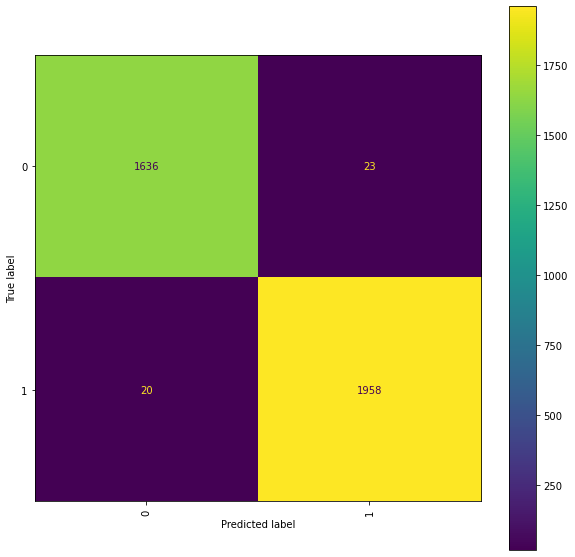

In [182]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
evaluate(model, X_test, y_test)

By running the cell below we will find the amount of false positives and false negatives.

In [183]:
pred = model.predict(X_test)
false_positives = 0
false_negatives = 0
for prediction, truth in zip(pred, y_test):
    if truth == 1 and prediction == 0:
        false_negatives += 1
    if truth == 0 and prediction == 1:
        false_positives += 1

print(f"False Positives: {false_positives}")
print(f"False negatives: {false_negatives}")

False Positives: 23
False negatives: 20


The cell below display's the ROC_AUC score and graph.

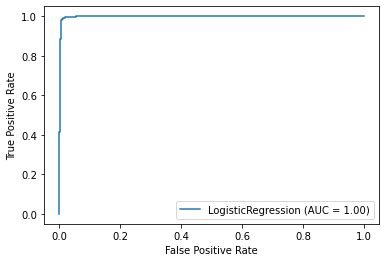

In [184]:
from sklearn.metrics import roc_curve, plot_roc_curve
roc_curve(y_test, model.predict_proba(X_test)[:,1])
plot_roc_curve(model, X_test, y_test)

# Binary Classification (Credit)

## Data Preperation
We will now look at credit data for another Binary Classification problem. We will load in the data as credit_data, veiw it and then split it similarly to the rice dataset. For this dataset we will be looking at payment history patterns for customers (the CustomerID field has been removed for anonymity) and try to predict if they will be credit risks or not.

In [185]:
credit_data = pd.read_csv('Company.csv')
credit_data

,Company Code,mean_payment_days_AUG_2021,mean_payment_days_JUL_2021,mean_payment_days_JUN_2021,mean_payment_days_MAY_2021,mean_payment_days_APR_2021,mean_payment_days_MAR_2021,mean_payment_days_FEB_2021,mean_payment_days_JAN_2021,mean_payment_days_DEC_2020,...,mean_payment_days_AUG_2020,mean_payment_days_JUL_2020,mean_payment_days_JUN_2020,Average_Payment_Days,"('total_counts', '0')","('total_counts', '1-30')","('total_counts', '31-60')","('total_counts', '61-90')","('total_counts', '90+')",Have Risk or not
0,1001,0,0,0,0,0,8,0,0,0,...,0,0,0,8,0,1,0,0,0,0
1,1001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1001,0,0,0,0,0,15,0,0,0,...,0,0,0,15,0,1,0,0,0,0
4,2001,0,0,0,0,0,0,0,0,0,...,0,0,0,113,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103771,8200,20,0,22,0,0,0,0,0,0,...,0,0,0,21,2,7,7,0,0,0
103772,8200,7,7,27,10,0,0,0,0,0,...,0,0,0,13,2,16,4,0,0,0
103773,8200,0,0,0,26,0,0,0,0,0,...,0,0,0,26,0,1,0,0,0,0
103774,8200,0,15,26,0,0,0,0,0,0,...,0,0,0,20,2,6,3,0,0,0


In [186]:
X_train, X_test, y_train, y_test = prepare_data(credit_data, 'Have Risk or not')

## Naive Rule Benchmark
Before we do any ML, lets look at the Naive Model accuracy. If a model cant beat the accuracy of the Naive Model, then there is no point in looking at it further.

In [187]:
naive_rule_accuracy(y_train,y_test)

The accuracy of the Naive Model is: 0.8103199074966275


# Logistic Regression Model
Now lets run the model, like we did above and see if we get an improved output from the naive rule.

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


accuracy: 0.9260454808248217
precision: 0.9248104448111908
recall: 0.9260454808248217
f1: 0.9252964746501027


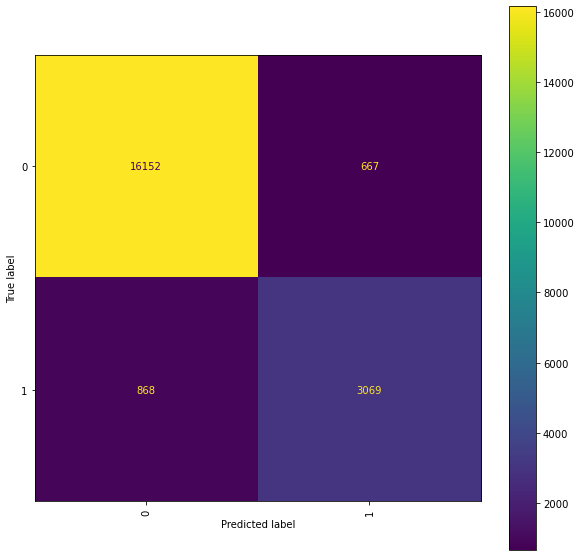

In [188]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
evaluate(model, X_test, y_test)

Run the cell below to see how many false positives and false negatives there were

In [189]:
pred = model.predict(X_test)
false_positives = 0
false_negatives = 0
for prediction, truth in zip(pred, y_test):
    if truth == 1 and prediction == 0:
        false_negatives += 1
    if truth == 0 and prediction == 1:
        false_positives += 1

print(f"False Positives: {false_positives}")
print(f"False negatives: {false_negatives}")

False Positives: 667
False negatives: 868


Run the cell below to see what the ROC_AUC score was

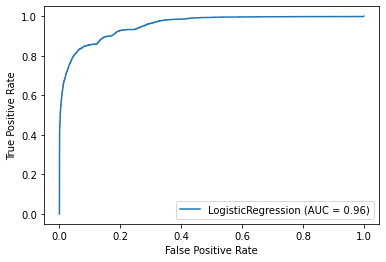

In [190]:
from sklearn.metrics import roc_curve, plot_roc_curve
roc_curve(y_test, model.predict_proba(X_test)[:,1])
plot_roc_curve(model, X_test, y_test)

# Classification (Crop Recommendation)

## Data Preparation
Now we will import the crop.csv dataset as crop_data. We will use this dataset to better predict the 'label' colunm. Run the cell below to see what the dataset looks like after it has been loaded.

In [127]:
crop_data = pd.read_csv('crops.csv')
crop_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


Just like the heart dataset, we will now split this dataset into training and test sets. If you would like to see what these datasets look like, run the cell, open another cell below them and type in the name(s) of the dataset(s) you wish to see (see similar example with heart_data above).

In [124]:
X_train, X_test, y_train, y_test = prepare_data(crop_data, 'label')

## Naive Rule Benchmark
Before we do any ML, lets look at the Naive Model accuracy. If a model cant beat the accuracy of the Naive Model, then there is no point in looking at it further. The Naive Rule Benchmark for this problem will be very low, given it is a multiple regression problem.

In [129]:
naive_rule_accuracy(y_train,y_test)

The accuracy of the Naive Model is: 0.031818181818181815


## Naive Bayes Model
We will first use the Naive Bayes Model on our dataset. We are using the Gaussian Naive Bayes Model as our predictor variables are continous and not discrete. Click the cell below to run it and get a confusion matrix, as well as the accuracy, percision, recall, f1 score and roc_auc.

accuracy: 0.9977272727272727
precision: 0.9978787878787879
recall: 0.9977272727272727
f1: 0.997742279730541
roc_auc: 1.0


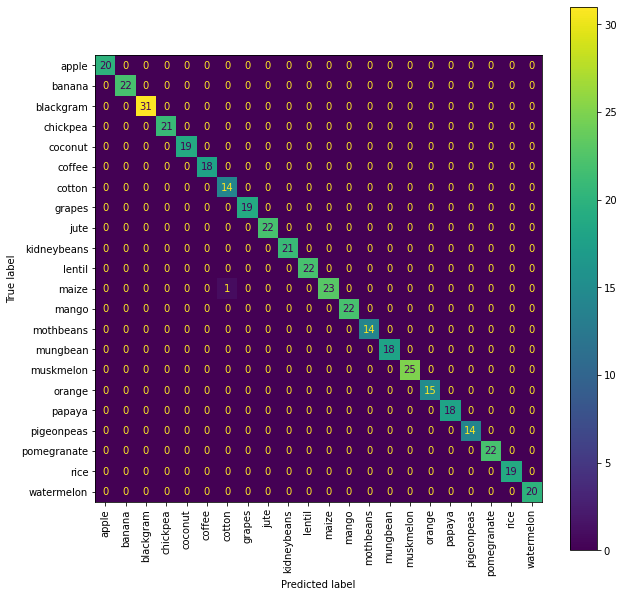

In [128]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
evaluate(model, X_test, y_test)

## Sochastic Gradient Descent Model
Now we will be running the Sochastic Gradient Descent Model. Click the cell below to produce the output and evaluate the model.

C:\Users\gu01042270\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy: 0.7090909090909091
precision: 0.7860241074749497
recall: 0.7090909090909091
f1: 0.6945589414223468


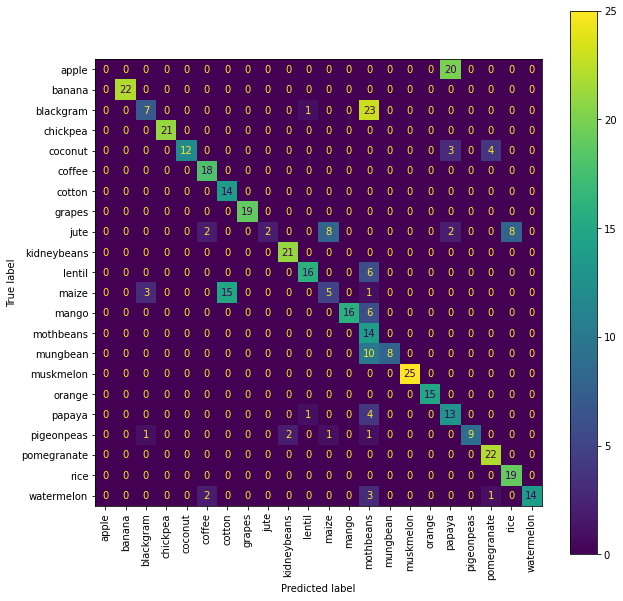

In [130]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(X_train, y_train)
evaluate(model, X_test, y_test)

## Perceptron Model
Now we will be running the Sochastic Gradient Descent Model. Click the cell below to produce the output and evaluate the model.

C:\Users\gu01042270\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy: 0.6636363636363637
precision: 0.6510815553846041
recall: 0.6636363636363637
f1: 0.6017872697931801


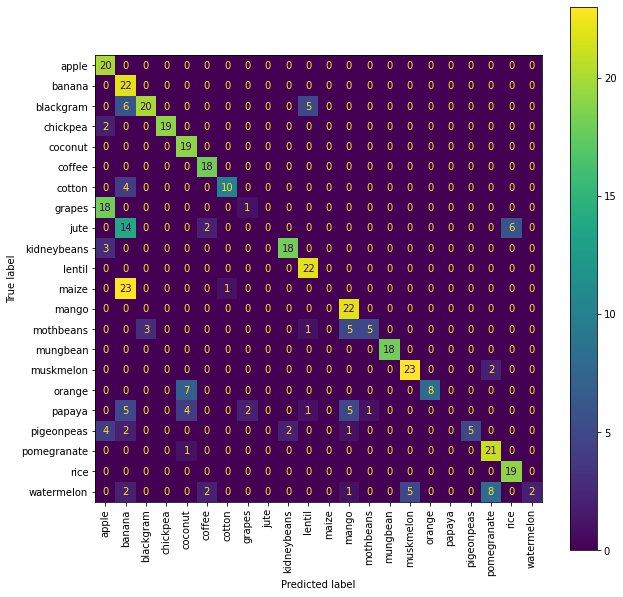

In [131]:
from sklearn.linear_model import Perceptron
model = Perceptron()
model.fit(X_train, y_train)
evaluate(model, X_test, y_test)

## Decision Tree Model
Now we will be running a Decision Tree Model. Click the cell below to produce the output and evaluate the model.

accuracy: 0.9886363636363636
precision: 0.9893344155844156
recall: 0.9886363636363636
f1: 0.9886467344712025
roc_auc: 0.9939333814333814


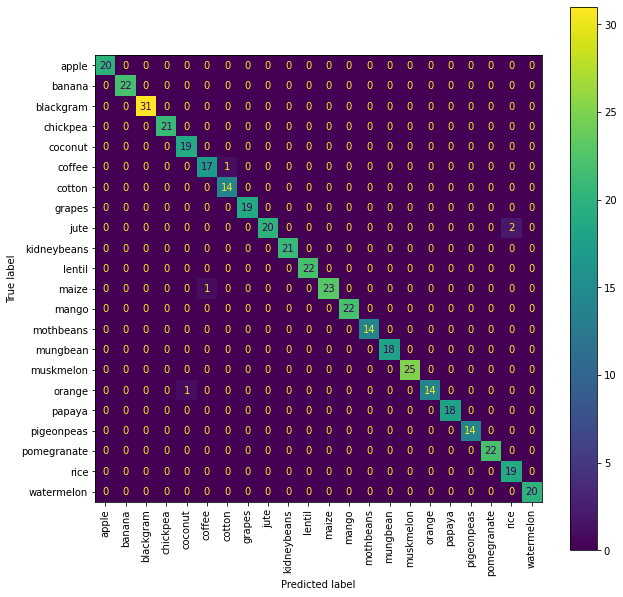

In [132]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
evaluate(model, X_test, y_test)

## XGBoost Model
Now we will be running a XGBoost Model. Click the cell below to produce the output and evaluate the model.

C:\Users\gu01042270\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:44:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.9886363636363636
precision: 0.9892232523907686
recall: 0.9886363636363636
f1: 0.9885978214624298
roc_auc: 0.9999808836830368


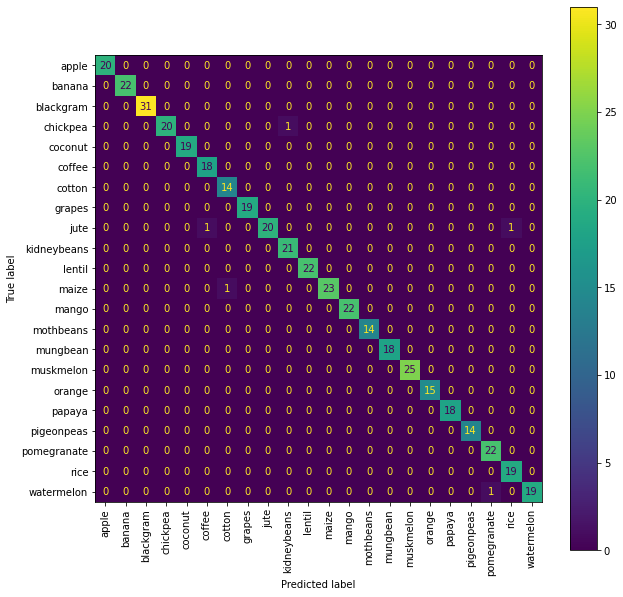

In [133]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
evaluate(model, X_test, y_test)

# Hyperparameter Tuning
We will use python to optimize the hyperparameters of our SGD Classifier. We want to see if through hyperparameter tuning we can improve the performance of the model. We will be using the same crop dataset as we used for the first SGD Model, so we will start by splitting the dataset again. 

In [191]:
X_train, X_test, y_train, y_test = prepare_data(crop_data, 'label')

Now let us write in the hyperparameter tuning function. In the param_grid we will be defining the various parameters we discussed in the slide. Run the 2 cells below to tune the model hyperparameters, the cells following will display the results of the tuning.

In [192]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "penalty": ['l1', 'l2', 'elasticnet'], ## The various options to put a penalty on errors (also known as regularization)
    "alpha": [0.0001, 0.001, 0.01], ## The constant that multiplies the regularization term. The higher the value the, the stronger the regularization
    "eta0": [0.001, 0.01, 0.1], ## The initial learning rate for the model. Will change with adaptive learning
    "learning_rate": ['constant', 'adaptive'] ## Does the model keep the learning rate constant or change as it runs based on performance
}
grid_cv = GridSearchCV(SGDClassifier(), param_grid, n_jobs=-1, cv=5, scoring="f1_weighted")
## n_jobs = means the number of jobs to run in parallel, -1 means use all processors
## scoring = what we will be scoring the model on, in our case it will be the weighted f1 score.

In [193]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'eta0': [0.001, 0.01, 0.1],
                         'learning_rate': ['constant', 'adaptive'],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='f1_weighted')

Run the cell below to see what is the best score produced by the optimal set of hyperparameters.

In [170]:
grid_cv.best_score_

0.8524432449673579

Run the cell below to find out which combination of hyperparameters turned out to be the best.

In [171]:
grid_cv.best_params_

{'alpha': 0.01,
 'eta0': 0.1,
 'learning_rate': 'adaptive',
 'penalty': 'elasticnet'}

Run both the cells below to evaluate the model with the optimal set of hyperparameters and see what the performance stats look like above. You will notice a significant improvement in the accuracy of the model.

In [195]:
model = grid_cv.best_estimator_

accuracy: 0.8636363636363636
precision: 0.9164405156331308
recall: 0.8636363636363636
f1: 0.8756390225289853


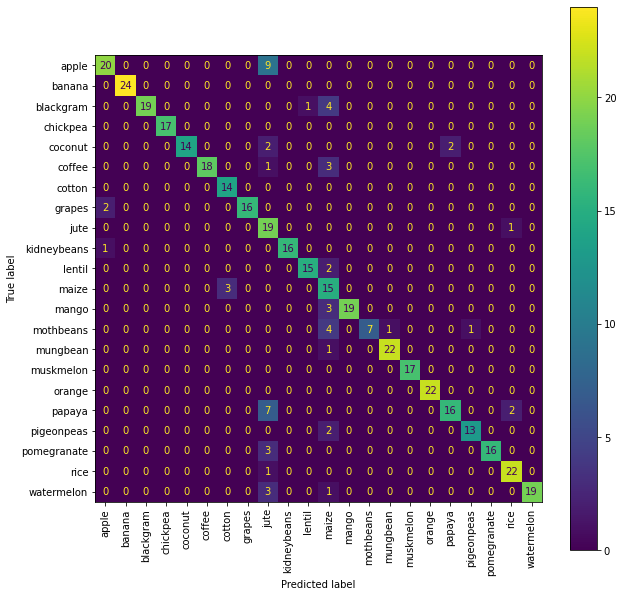

In [196]:
evaluate(model, X_test, y_test)

# Feature Scaling
We want to see if our model preforms any better if we standardize or normalize the data. Just like before we will be using our crop data and splitting into training and test sets. We will be using the same SGDC classifier because that model had some room for improvement. We want to see if either standardization or normalization will improve the model.

## Data Prep
First step is to split the data into training and test sets

In [148]:
X_train, X_test, y_train, y_test = prepare_data(crop_data, 'label')

Now we will scale the data. We are going to both normalize the data and standardize it.

In [149]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = crop_data.drop("label", axis=1)
y = crop_data["label"]

standard_scaler = StandardScaler()
standard_scaler.fit(X)
X_s_scaled = pd.DataFrame(standard_scaler.transform(X), columns=X.columns)

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X)
X_mm_scaled = pd.DataFrame(minmax_scaler.transform(X), columns=X.columns)
with pd.option_context('display.float_format', lambda x: '%.3f' % x):  
    print("Unscaled Data:") 
    display(X.describe())
    print("Standardized Data:")
    display(X_s_scaled.describe())
    print("Normalized Data:")
    display(X_mm_scaled.describe())

Unscaled Data:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000,2200.000,2200.000,2200.000,2200.000,2200.000,2200.000
mean,50.552,53.363,48.149,25.616,71.482,6.469,103.464
std,36.917,32.986,50.648,5.064,22.264,0.774,54.958
min,0.000,5.000,5.000,8.826,14.258,3.505,20.211
25%,21.000,28.000,20.000,22.769,60.262,5.972,64.552
50%,37.000,51.000,32.000,25.599,80.473,6.425,94.868
75%,84.250,68.000,49.000,28.562,89.949,6.924,124.268
max,140.000,145.000,205.000,43.675,99.982,9.935,298.560


Standardized Data:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000,2200.000,2200.000,2200.000,2200.000,2200.000,2200.000
mean,-0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.370,-1.466,-0.852,-3.317,-2.571,-3.832,-1.515
25%,-0.801,-0.769,-0.556,-0.562,-0.504,-0.643,-0.708
50%,-0.367,-0.072,-0.319,-0.003,0.404,-0.057,-0.156
75%,0.913,0.444,0.017,0.582,0.830,0.587,0.379
max,2.423,2.779,3.098,3.567,1.280,4.479,3.551


Normalized Data:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000,2200.000,2200.000,2200.000,2200.000,2200.000,2200.000
mean,0.361,0.345,0.216,0.482,0.668,0.461,0.299
std,0.264,0.236,0.253,0.145,0.260,0.120,0.197
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.150,0.164,0.075,0.400,0.537,0.384,0.159
50%,0.264,0.329,0.135,0.481,0.772,0.454,0.268
75%,0.602,0.450,0.220,0.566,0.883,0.532,0.374
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


## Unscaled Data
We are going to run the same model on the three datasets above and see which one comes out with the best performance. All of them are SGDC Models and we will see the confusion matrix, accuracy, percision, recall and the f1 score.

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


accuracy: 0.6681818181818182
precision: 0.759317618054987
recall: 0.6681818181818182
f1: 0.6320784666152437


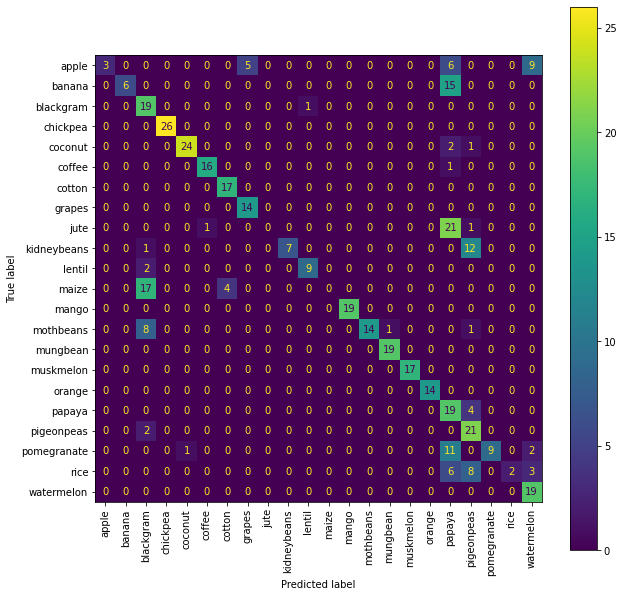

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SGDClassifier()
model.fit(X_train, y_train)
evaluate(model, X_test, y_test)

## Standardized Data

accuracy: 0.8909090909090909
precision: 0.9381344101019559
recall: 0.8909090909090909
f1: 0.9028119728069685


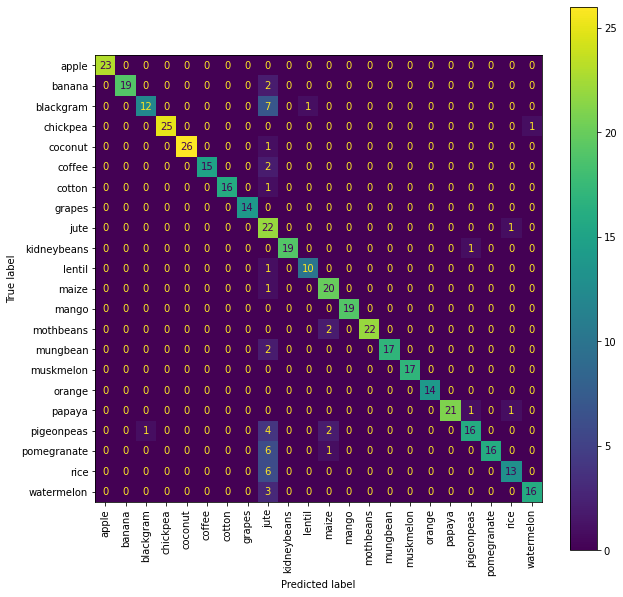

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_s_scaled, y, test_size=0.2, random_state=42)
model = SGDClassifier()
model.fit(X_train, y_train)
evaluate(model, X_test, y_test)

## Normalized Data

accuracy: 0.8568181818181818
precision: 0.8805676215619398
recall: 0.8568181818181818
f1: 0.8484967545154686


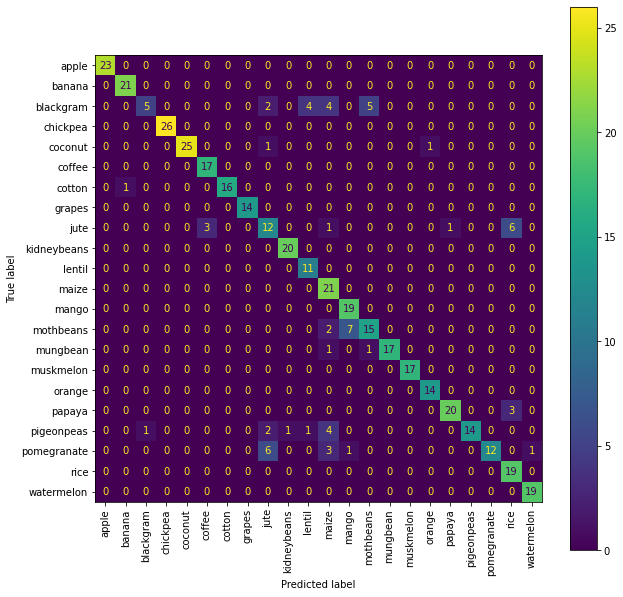

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X_mm_scaled, y, test_size=0.2, random_state=42)
model = SGDClassifier()
model.fit(X_train, y_train)
evaluate(model, X_test, y_test)

# SHAP Values
To understand the importance of predictor variable will have on the outcome, we can use the SHAP package in python. We want to know how the predictors affect the outcome for our crop dataset with an XGBoost model so we will first train an XGBoost Model with that data again then see the shap values.

In [199]:
import shap
import matplotlib.pyplot as pl

Split the dataset into training and test sets, like before.

In [143]:
X_train, X_test, y_train, y_test = prepare_data(crop_data, 'label')

Let us know train and evaluate the model, same as we did once before.

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[18:58:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 0.9954545454545455
precision: 0.9957048748353096
recall: 0.9954545454545455
f1: 0.9954648396852125
roc_auc: 1.0


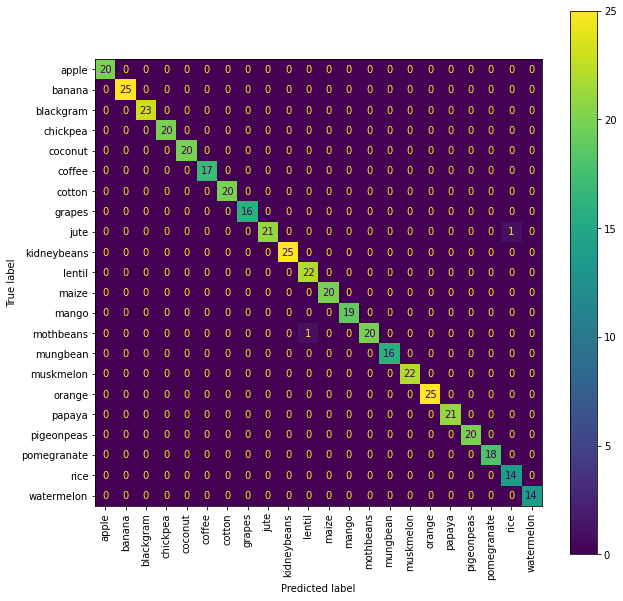

In [144]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
evaluate(model, X_test, y_test)

Run the two cell below to calculate the SHAP values. It may take a couple minutes to complete.

In [197]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

Run the cell below to see a bar plot of the SHAP values for each outcome. You will notice that after a comma there is a number from 0 - 21. That number represents one of the 22 outcomes the target variable could take and the graph will represent the importance of the features that will lead to that specific outcome. To see how the SHAP values change with each target class, change the number from what is with anything in between 0 and 21.

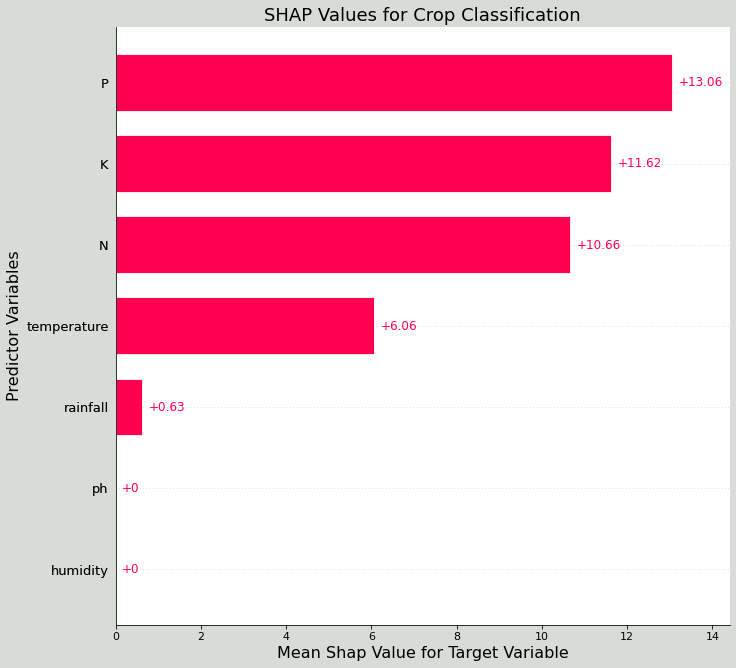

In [221]:
shap.plots.bar(shap_values[...,21], show=False)
fig = plt.gcf()
ax = plt.gca()
fig.set_figheight(11)
fig.set_figwidth(11)
font_dict = {'size':16}
font_dict_title = {'size':18}
fig.patch.set_facecolor('xkcd:light grey')
plt.xlabel('Mean Shap Value for Target Variable',font_dict)
plt.ylabel('Predictor Variables', font_dict)
plt.title('SHAP Values for Crop Classification', font_dict_title)
plt.show()